# Data Analysis Project: Exploring the Relationship Between Alcohol Use and Traffic Accidents in the United States

## Introduction

This Colab notebook explores the correlation between alcohol consumption and traffic fatalities in the United States. It analyzes data from multiple sources over a three-year period.

## Data Dictionary
- State (string): The name of the U.S. state. Data Type: String
- Year_2019 (int): Highway Traffic fatalities in the year 2019
- Year_2020 (int): Highway Traffic fatalities in the year 2020
- Year_2021 (int): Highway Traffic fatalities in the year 2021

## Project Goals
- To Visualize Alcohol consumption and Highway traffic deaths by State
- To investigate the relationship between alcohol consumption and Highway traffic deaths

### Data Integration
- Combined and analyzed state-level data on alcohol use in the United States.
- Integrated this information with datasets on alcohol-related traffic accidents by state.

### Correlation Analysis
- Applied statistical methods to identify correlations between alcohol use metrics and the incidence of traffic accidents at the state level.
- Visualized these relationships through charts and graphs to enhance interpretability.

### Data Visualization
- Utilized Matplotlib to create visually appealing representations of the analysis results.
- Present state-specific patterns and trends that may emerge from the correlation analysis.

### Reproducibility and Documentation
- Developed a well-documented and reproducible data analysis program using Jupyter Notebook.
- Provided clear documentation of data cleaning steps, analysis methodologies, and visualization processes.

## Results
- Key insights from the analysis.
- Visualizations illustrating the correlation between alcohol consumption and traffic fatalities.

## Acknowledgements
- The Data was obtained from the US National Highway Traffic Safety Administration
-The data about US fatalities were obtained from the National Institute on Alcohol Abuse and Alcoholism

## Why This Analysis?

Understanding the intricate relationship between alcohol use and traffic accidents at the national level is crucial for crafting effective public safety strategies. By examining state-level data, this project aims to contribute nuanced insights that may guide targeted interventions and policy decisions aimed at improving road safety across the United States.

##Summary Findings
This analysis explored the relationship between alcohol consumption and traffic fatalities in the United States from 2019 to 2021. The investigation revealed a notable negative correlation between the average alcohol consumption per state and the corresponding traffic fatalities. States with higher levels of per capita alcohol consumption tended to exhibit lower average traffic fatalities, suggesting a potential inverse relationship between these two variables.

The negative correlation implies that, on average, States with higher alcohol consumption may experience a reduced incidence of traffic fatalities. While correlation does not imply causation, these findings prompt further inquiry into the nuanced factors influencing road safety. Possible explanations may involve variations in public transportation usage, law enforcement practices, or cultural attitudes towards alcohol.

## Data Analysis Capstone Project Requirements


**Requirement 1: Clean and Preprocess the data**

  - Clean and preprocess the data then merge

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Viridis256
import geopandas as gpd
import zipfile
import os
from shapely.wkt import loads

# Set the style for Matplotlib and Seaborn
sns.set(style="whitegrid")

**Load Data**

This project uses two excel files and States shapefile
*  The first dataset contains US Highway  fatalities 2019-2021
*   The second dataset contains Per Capital alcohol consumption for 43 states 2019-2021. The data for 7 states was missing was incomplete and hence omitted.

*   The third dataset contains States geographic data from mapping






In [11]:
#Load the datasets
merged_data= pd.read_csv("datasets/merged_data.csv")

#display the first 5 rows of the merged_data
merged_data.head()

,State,Year_2019,Year_2020,Year_2021,2019_c,2020_c,2021_c
0,Alabama,0.237216,0.208691,0.190491,2.68,2.50,2.65
1,Alaska,0.011472,0.006617,0.005603,3.24,3.42,3.65
2,Arizona,0.243632,0.240522,0.243489,2.42,2.34,2.52
3,Arkansas,0.123858,0.144492,0.132193,2.33,2.21,2.36
4,California,0.937974,0.952432,0.884767,2.37,2.33,2.48


In [12]:
#load the second dataset containing Highway traffic fatalities, Alcohol consumption and States' geographic location
merged_map_data= pd.read_csv("datasets/merged_data_map.csv")

#display the first 5 rows of the dataset
merged_map_data.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,State,Year_2019,Year_2020,Year_2021,2019_c,2020_c,2021_c
0,1,PERMIT TRACKING,AL,alabama,F,919,"POLYGON ((-85.0700670965606 31.9807030853166, ...",alabama,0.237216,0.208691,0.190491,2.68,2.50,2.65
1,2,NaN,AK,alaska,N,920,MULTIPOLYGON (((-161.333785127379 58.733248100...,alaska,0.011472,0.006617,0.005603,3.24,3.42,3.65
2,3,AZURITE,AZ,arizona,F,921,"POLYGON ((-114.520627666533 33.0277074291687, ...",arizona,0.243632,0.240522,0.243489,2.42,2.34,2.52
3,4,PDS,AR,arkansas,F,922,"POLYGON ((-94.4616914446557 34.1967651981701, ...",arkansas,0.123858,0.144492,0.132193,2.33,2.21,2.36
4,5,NaN,CA,california,N,923,MULTIPOLYGON (((-121.665219944683 38.169285281...,california,0.937974,0.952432,0.884767,2.37,2.33,2.48


**Pandas Pivot Table**

Pandas pivot table using the merged dataset and then generate a Seaborn plot to visualize the summarized data. In this visualization the pivot table shows the average values of alcohol consumption ('2019_c', '2020_c', '2021_c') for each state.

Pivot Table:
                      Average_alcohol_consumption
State                                            
Alabama                                  2.610000
Alaska                                   3.436667
Arizona                                  2.426667
Arkansas                                 2.300000
California                               2.393333
Colorado                                 2.803333
Connecticut                              2.563333
Delaware                                 2.710000
District of Columbia                     2.733333
Florida                                  2.466667
Georgia                                  2.403333
Hawaii                                   2.296667
Idaho                                    2.530000
Illinois                                 2.520000
Indiana                                  2.543333
Iowa                                     2.433333
Kansas                                   2.423333
Kentucky                             

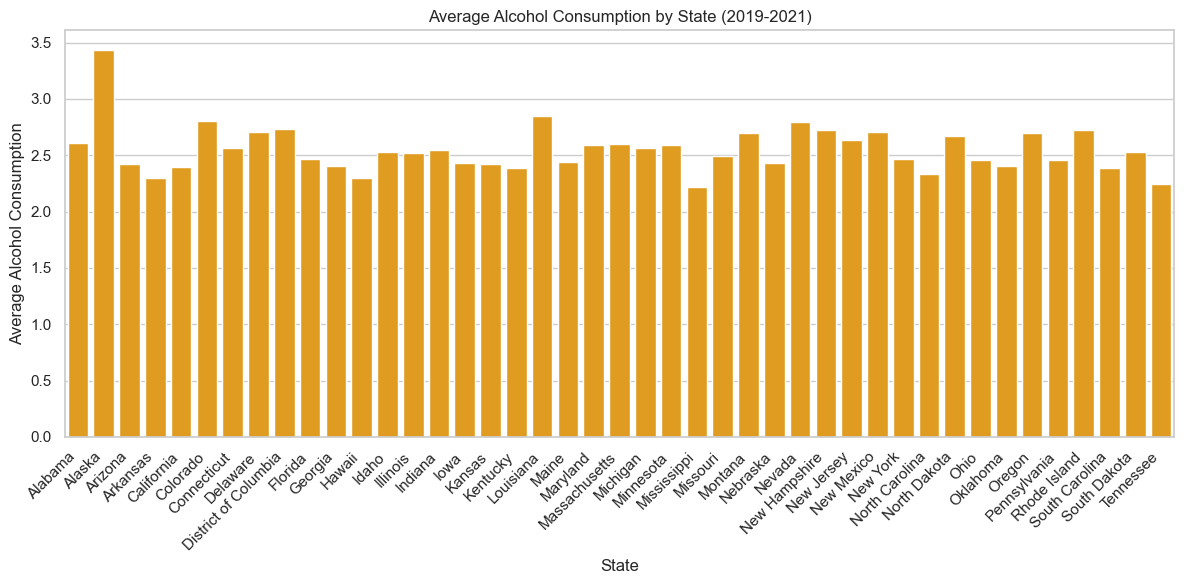

In [13]:


# Calculate the average alcohol consumption for each state over the three years
merged_data['Average_alcohol_consumption'] = merged_data[['2019_c', '2020_c', '2021_c']].mean(axis=1)

# Create a pivot table to show the average alcohol consumption for each state
pivot_table = merged_data.pivot_table(values='Average_alcohol_consumption', index='State')

# Display the pivot table
print("Pivot Table:")
print(pivot_table)

# Create a Seaborn bar plot to visualize the average alcohol consumption
plt.figure(figsize=(12, 6))
sns.barplot(x=pivot_table.index, y='Average_alcohol_consumption', data=pivot_table, color='orange')

# Customize the plot
plt.title('Average Alcohol Consumption by State (2019-2021)')
plt.xlabel('State')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


**Bar Chart**

The bar chart visualizes average highway fatalities due attributable to drinking under influence.

Pivot Table - Average Deaths:
                      Average_deaths
State                               
Alabama                     0.212132
Alaska                      0.007897
Arizona                     0.242548
Arkansas                    0.133514
California                  0.925058
Colorado                    0.141393
Connecticut                 0.063829
Delaware                    0.020957
District of Columbia        0.000000
Florida                     0.766189
Georgia                     0.356049
Hawaii                      0.016241
Idaho                       0.047483
Illinois                    0.273619
Indiana                     0.191036
Iowa                        0.076145
Kansas                      0.084757
Kentucky                    0.163569
Louisiana                   0.187907
Maine                       0.030710
Maryland                    0.126397
Massachusetts               0.079342
Michigan                    0.239223
Minnesota                   0.086214
Mississi

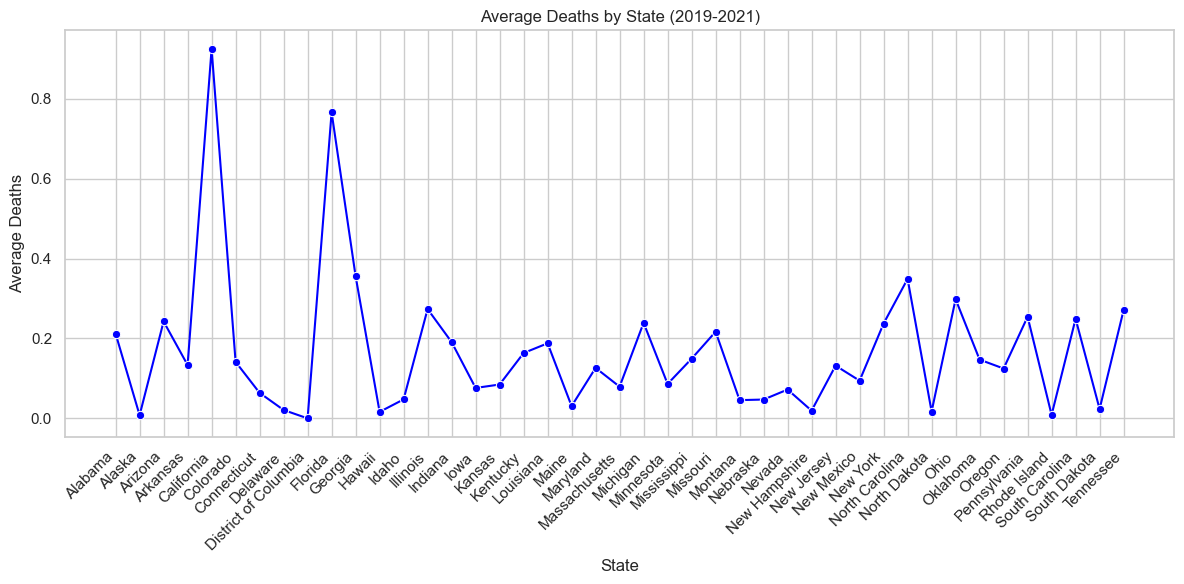

In [14]:
# Calculate the average deaths for each state over the three years
merged_data['Average_deaths'] = merged_data[['Year_2019', 'Year_2020', 'Year_2021']].mean(axis=1)

# Create a pivot table to show the average deaths for each state
pivot_table_deaths = merged_data.pivot_table(values='Average_deaths', index='State')

# Display the pivot table
print("Pivot Table - Average Deaths:")
print(pivot_table_deaths)

# Create a Seaborn line plot to visualize the average deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot_table_deaths.index, y='Average_deaths', data=pivot_table_deaths, marker='o', color='blue')

# Customize the plot
plt.title('Average Deaths by State (2019-2021)')
plt.xlabel('State')
plt.ylabel('Average Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


**Bokeh Visualization**

This Bokeh visualization presents an interactive bar plot illustrating the average alcohol consumption across different U.S. states for the years 2019 to 2021. Each bar represents the mean consumption, allowing users to hover over bars for detailed information. For simplicity, the visualization is displayed on the notebook.

In [15]:
# Calculate the average alcohol consumption for each state over the three years
merged_data['Average_alcohol_consumption'] = merged_data[['2019_c', '2020_c', '2021_c']].mean(axis=1)

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(merged_data)

# Clear the Bokeh document
from bokeh.io import curdoc
curdoc().clear()

# Create a Bokeh figure
p = figure(x_range=source.data['State'], width=800, title='Average Alcohol Consumption by State (2019-2021)',
           toolbar_location=None, tools='')

# Create the bar plot
p.vbar(x='State', top='Average_alcohol_consumption', width=0.9, color=Viridis256[150], source=source)

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1.2
p.yaxis.axis_label = 'Average Alcohol Consumption'

# Show the plot in the notebook
output_notebook()
show(p)


Loading BokehJS ...

**Average Per Capita Alcohol Consumption Choropleth map**

This section uses a Choropleth to visualize the average alcohol consumption in the States under consideration. It uses the States shapefile available at https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e. The two datasets are merged on States and Visualized as demonstrated.

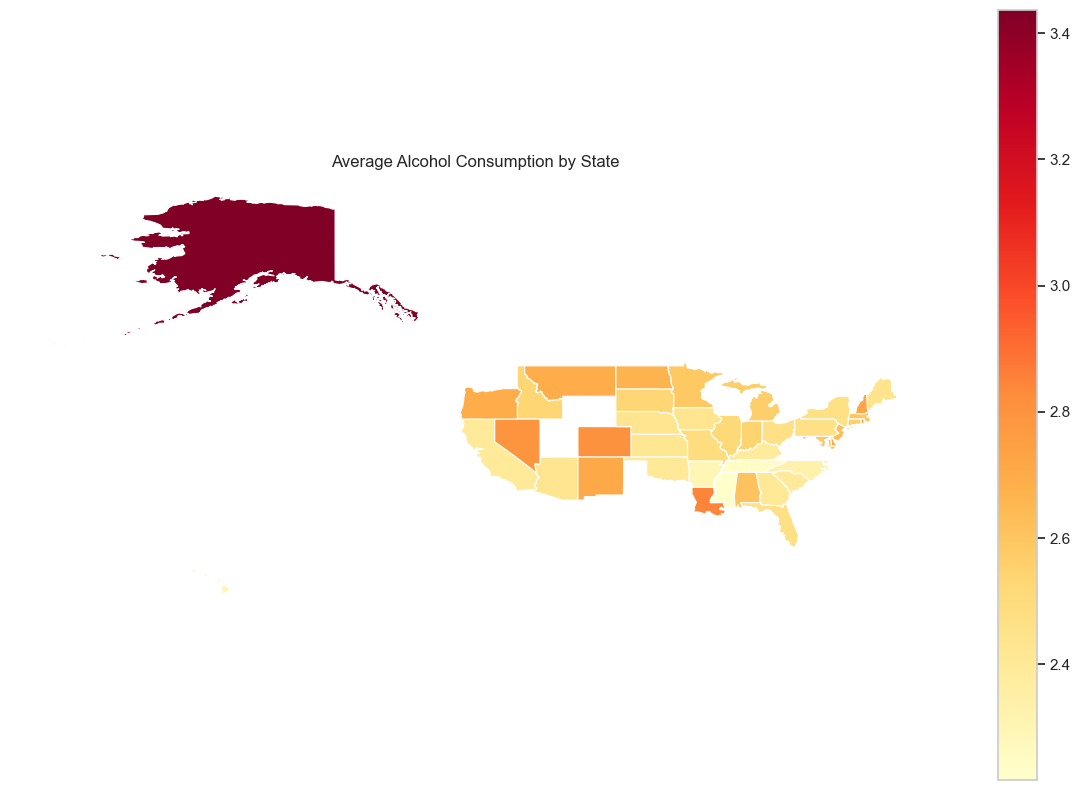

In [16]:
# Calculate the average alcohol consumption across the years
merged_map_data['Avg_Consumption'] = merged_map_data[['2019_c', '2020_c', '2021_c']].mean(axis=1)

# Convert the WKT strings to Shapely geometries
merged_map_data['geometry'] = merged_map_data['geometry'].apply(loads)

# Create a GeoDataFrame with the average consumption column
gdf = gpd.GeoDataFrame(merged_map_data, geometry='geometry')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the GeoDataFrame with the 'Avg_Consumption' column
gdf.plot(column='Avg_Consumption', cmap='YlOrRd', linewidth=0.8, ax=ax, legend=True)

# Customize the plot
ax.set_title('Average Alcohol Consumption by State')
ax.set_axis_off()

# Display the plot
plt.show()

**Average Highway Deaths Choropleth map**

This section uses a Choropleth to visualize the average Highway deaths due to driving under influence in the States under consideration. It uses the States shapefile available at https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e.

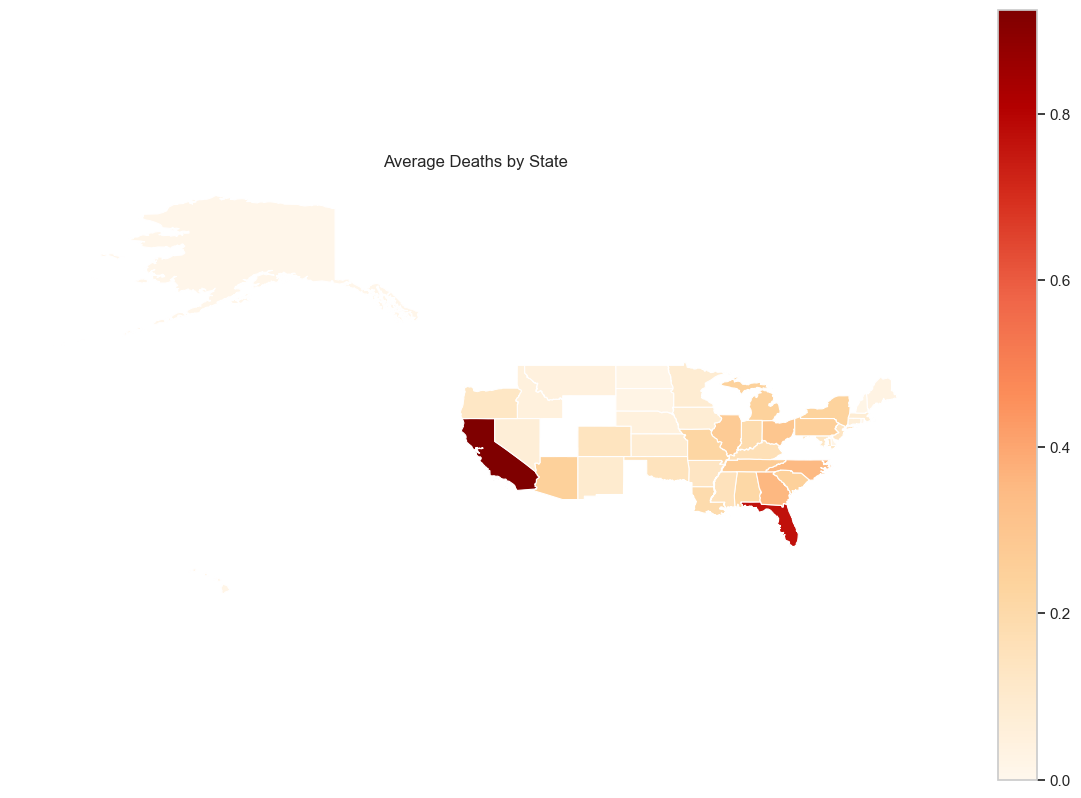

In [17]:
# Calculate the average deaths across the years
merged_map_data['Avg_Deaths'] = merged_map_data[['Year_2019', 'Year_2020', 'Year_2021']].mean(axis=1)

# Create a GeoDataFrame with the average deaths column
gdf_deaths = gpd.GeoDataFrame(merged_map_data, geometry='geometry')

# Plot the choropleth map for average deaths
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the GeoDataFrame with the 'Avg_Deaths' column
gdf_deaths.plot(column='Avg_Deaths', cmap='OrRd', linewidth=0.8, ax=ax, legend=True)

# Customize the plot
ax.set_title('Average Deaths by State')
ax.set_axis_off()

# Display the plot
plt.show()

**Scatter Plot and Regression Line**

The scatter plot with a regression line visually explores the relationship between average alcohol consumption and average fatalities across U.S. states from 2019 to 2021. The scatter points represent individual states, while the red regression line provides insights into the overall trend in the data

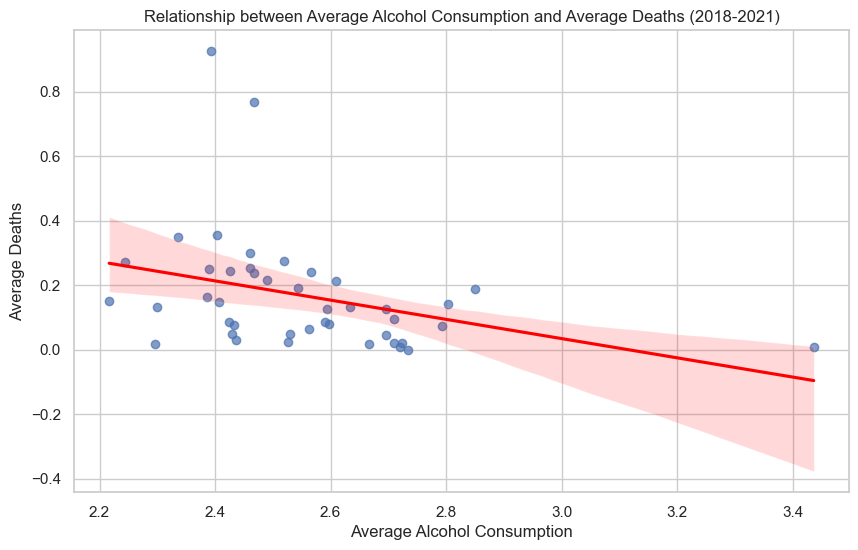

In [18]:

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Average_alcohol_consumption', y='Average_deaths', data=merged_data, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Customize the plot
plt.title('Relationship between Average Alcohol Consumption and Average Deaths (2018-2021)')
plt.xlabel('Average Alcohol Consumption')
plt.ylabel('Average Deaths')
plt.grid(True)

# Show the plot
plt.show()



##Summary of Findings
This analysis explored the relationship between alcohol consumption and traffic fatalities in the United States from 2019 to 2021. The investigation revealed a notable negative correlation between the average alcohol consumption per state and the corresponding traffic fatalities. States with higher levels of per capita alcohol consumption tended to exhibit lower average traffic fatalities, suggesting a potential inverse relationship between these two variables.

The negative correlation implies that, on average, States with higher alcohol consumption may experience a reduced incidence of traffic fatalities. While correlation does not imply causation, these findings prompt further inquiry into the nuanced factors influencing road safety. Possible explanations may involve variations in public transportation usage, law enforcement practices, or cultural attitudes towards alcohol.
